<h1>
<center>
Dataquest Guided Project 17:
Predicting Bike Rentals
</center>
</h1>

## Introduction

This is part of the Dataquest program.

- part of paths **Data Scientist in Python**
    - Step 6: **Machine Learning**
        - Course 6 :  **Decision Trees **
            - Introduction to Decision Trees
            - Building Decision Trees
            - Applying Decision Trees
            - Random Forest
            
As this is a guided project, we are following and deepening the steps suggested by Dataquest. In this project, we will create a few different machine learning models and evaluate their performance.

## Use case : Predicting Bike Rentals

Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bikes people rent by the hour and day.

The [University of Porto](http://www.up.pt/) compiled this data into a CSV file, which we'll be working with. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. We can download the data from the [University of California Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

Here are the descriptions for the relevant columns : 

|Header | Description|
|--------|-----------|
|**instant** | A unique sequential ID number for each row|
|**dteday**| The date of the rentals|
|**season**| The season in which the rentals occured|
|**yr**| The hour the rentals occurred |
|**mnth**| The month the rentals occurred |
|**hr**| The hour the rentals occurred |
|**holiday**| Whether or not the day was a holiday|
|**weekday**| The day of the week (as a number, 0 to 7)|
|**workingday**| Whether or not the day was a working day|
|**weathersit**| The weather (as a categorical variable)|
|**temp**| The temperature, on a 0-1 scale|
|**atemp**| The adjusted temperature|
|**hum**| The humidity, on a 0-1 scale|
|**windspeed**| The wind speed, on a 0-1 scale|
|**casual**| The number of casual riders (people who hadn't previously signed up with the bike sharing program)|
|**registered**| The number of registered riders (people who had already signed up)|
|**cnt**| The total number of bike rentals (**casual** + **registered**)|

In this project, we'll try to predict the total number of biked people rented in a given hour. We'll predict the **cnt** column using all of the other columns, except for **casual** and ** registered**. To accomplish this, we'll create a few different machine learning models and evaluate their performance.

## Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(font_scale=2)
sns.set_palette("husl")
sns.set_style("white")

In [2]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")

## Introduction to the dataset

Let's print out the first few rows of bike_rentals to take a look at the data

In [3]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Let's take a look at the distribution of total rentals : 

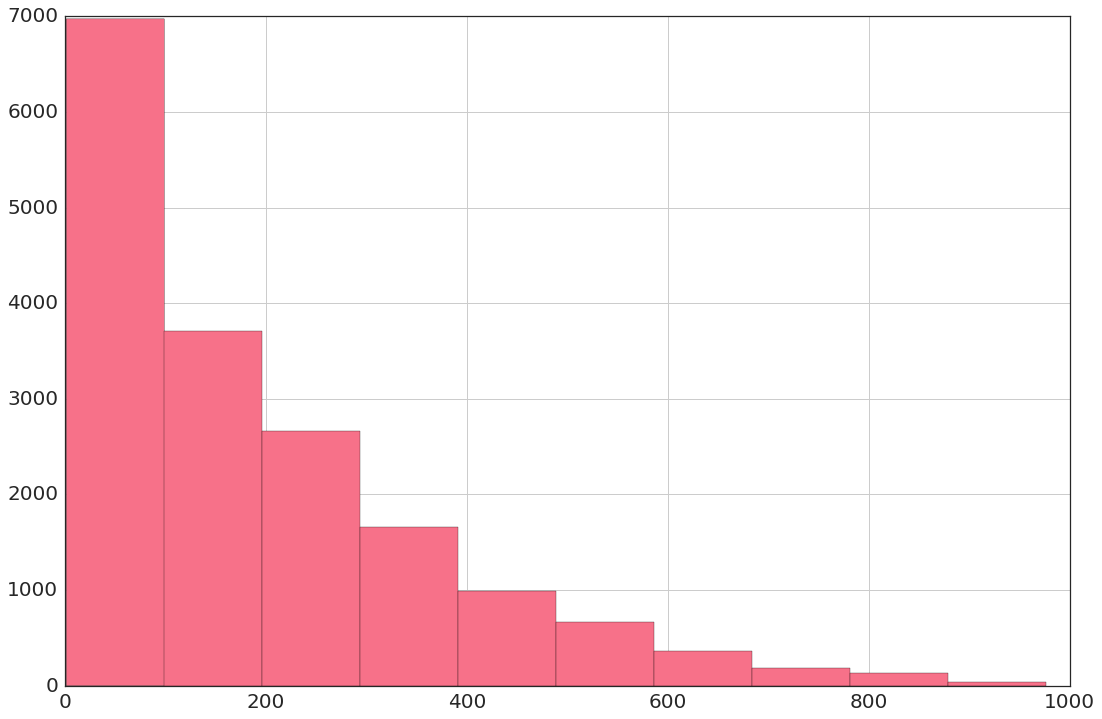

In [4]:
plt.figure(figsize=(18, 12));
bike_rentals["cnt"].hist();

In [5]:
bike_rentals['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

Let's now check how each column is correlated with **cnt**.

In [6]:
abs(bike_rentals.corr()["cnt"]).sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

Of course, **registered** and **casual** are highly correlated to cnt (cnt is the addition of those two features). We'll drop these columns to avoid target leakage. Otherwise, we can't see strong correlations. 

## Calculating Features

The **hr** column in bike_rentals contains the jours during which bikes are rented, from 1 to 24. A machine Learning algorithm will treat each hour differently, without understanding that certain hours are related. We can introduce some orders into the process by creating a new column with labels for four time periods: morning(1), afternoon(2), evening(3) and night(4). This strategy will bundle similar times together, enabling the model to make better predictions. 

In [7]:
def assign_label(hour):
    if hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <= 24:
        return 3
    elif hour >=0 and hour <6:
        return 4

In [8]:
bike_rentals["time_labels"] = bike_rentals["hr"].apply(assign_label)

## Splitting the Data Into Train and Test Sets

Before applying machine learning algorithms, we'll need to split the data into training and testings sets. This will enable us to train an algorithm using the training set, and evaluate its accuracy on the testing set. We'll randomly sample 80% of the data and assign it to the training set. Then we can use the remaining 20% as the testing set.

The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [9]:
train = bike_rentals.sample(frac=.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Applyling Linear Regression

We'll also remove the columns that have a correlation coefficient less than 0.05.

In [10]:
cols_to_drop = ["cnt", "casual", "dteday", "registered", "weekday", "workingday", "holiday"]
features = train.drop(cols_to_drop, axis=1).columns

In [11]:
from sklearn.linear_model import LinearRegression

Train a linear regression model on the train dataset with the selected features: 

In [12]:
linear = LinearRegression()
linear.fit(train[features], train["cnt"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Use it to make predictions on the test dataset : 

In [13]:
predictions = linear.predict(test[features])

Let's compute the mean squared error : 

In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test["cnt"], predictions)
mse

16863.47167437046

The error is very high, which may be because the data has a few extremely high rental counts, but otherwise mostly low numbers. More substantial errors are penalized more with MSE, which leads to a higher total error.
Let's compute the RMSE to compare with the results on the same scale.

In [15]:
rmse = np.sqrt(mse)
mean = train["cnt"].mean()
std = train["cnt"].std()
print("The rmse is {:03.2f}, mean of the training set is {:03.2f} and std {:03.2f}".format(rmse, mean, std))

The rmse is 129.86, mean of the training set is 190.77 and std 182.37


We have the confirmation that the model is pretty bad. This can be because a lot of columns are categorical and Linear Regression is better with only continuous and linear data.

Let's try building a decision tree instead. Because a decision tree is a relatively complex model, it also tends to overfit, particularly when we don't tweak parameters like maximum depth and a minimum number of sample per leaf. Decision trees are also prone to instability (small change in the input data can result in a very different output model). 

## Applying Decision Trees

Let's start by building a single tree model.

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
tree = DecisionTreeRegressor(min_samples_leaf=5)
tree.fit(train[features], train["cnt"])
predictions = tree.predict(test[features])

In [18]:
mse = mean_squared_error(test['cnt'], predictions)
mse

8851.56660104754

The error is better, but can be improved. Let's tweak the minimum number of leaf: 

In [19]:
results = pd.DataFrame(columns=["min leafs", "learning mse","validation mse"])

for i in range(1,11):
    tree = DecisionTreeRegressor(min_samples_leaf=i)
    tree.fit(train[features], train["cnt"])
    
    learning_predictions = tree.predict(train[features])
    validation_predictions = tree.predict(test[features])

    learning_mse = mean_squared_error(train['cnt'], learning_predictions)
    validation_mse = mean_squared_error(test['cnt'], validation_predictions)

    results = results.append({'min leafs' : i,
                              'learning mse': learning_mse,
                             'validation mse': validation_mse}, ignore_index=True)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


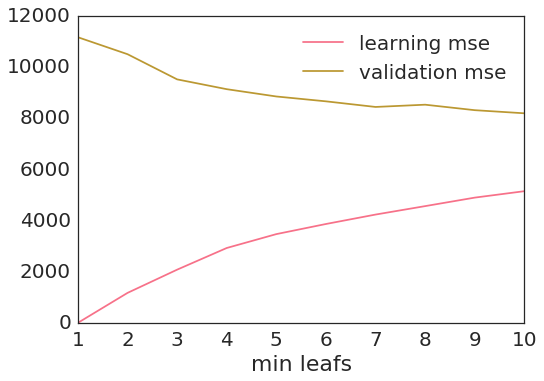

In [20]:
plt.figure(figsize=(18, 12));
results.plot(x='min leafs', y=['learning mse', 'validation mse']);

When the learning error is close to zero, it's a proof of overfitting. We can also "play" with other parameters like the maximum deepness of the tree. But as the global error is not satisfying, let's build a Random Forest algorithm. 

## Applying Random Forests

Due to the way random forests are constructed, they tend to overfit much less than decision trees. Random forests can still be prone to overfitting, though, so it's important to tune parameters like number of trees in the forest and minimum sample per leaf. 

In [21]:
from sklearn.ensemble import RandomForestRegressor

We'll first try several estimators, fixing the minimum sample per leaf to the default value (2).

In [22]:
results = pd.DataFrame(columns=["estimators", "learning mse","validation mse"])

for i in range(1,300, 50):
    tree = RandomForestRegressor(n_estimators=i)
    tree.fit(train[features], train["cnt"])
    
    learning_predictions = tree.predict(train[features])
    validation_predictions = tree.predict(test[features])

    learning_mse = mean_squared_error(train['cnt'], learning_predictions)
    validation_mse = mean_squared_error(test['cnt'], validation_predictions)

    results = results.append({'estimators' : i,
                              'learning mse': learning_mse,
                             'validation mse': validation_mse}, ignore_index=True)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


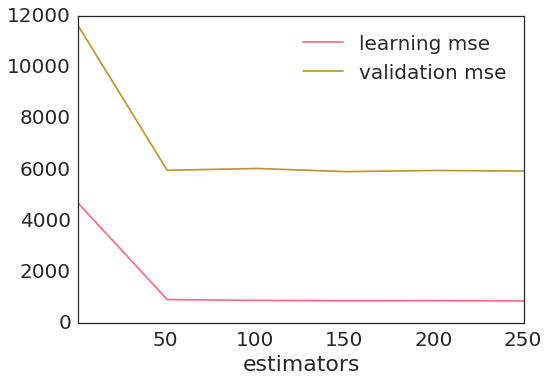

In [23]:
plt.figure(figsize=(18, 12));
results.plot(x='estimators', y=['learning mse', 'validation mse']);

Then, let's try several minimum sample per leaf, using the best estimators value.

In [24]:
results[results["validation mse"] == results["validation mse"].min()]

,estimators,learning mse,validation mse
3,151.0,861.922917,5910.520073


In [25]:
results = pd.DataFrame(columns=["min leafs", "learning mse","validation mse"])

for i in range(1,20):
    tree = RandomForestRegressor(min_samples_leaf=i, n_estimators=151)
    tree.fit(train[features], train["cnt"])
    
    learning_predictions = tree.predict(train[features])
    validation_predictions = tree.predict(test[features])

    learning_mse = mean_squared_error(train['cnt'], learning_predictions)
    validation_mse = mean_squared_error(test['cnt'], validation_predictions)

    results = results.append({'min leafs' : i,
                              'learning mse': learning_mse,
                             'validation mse': validation_mse}, ignore_index=True)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


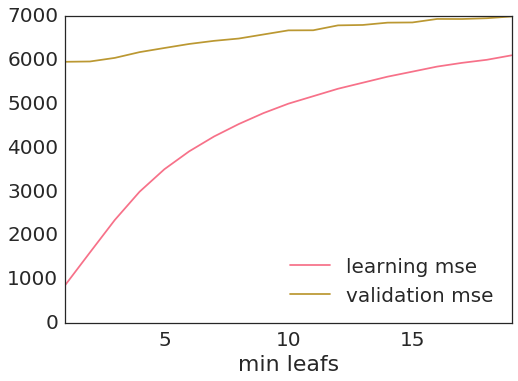

In [26]:
plt.figure(figsize=(18, 12));
results.plot(x='min leafs', y=['learning mse', 'validation mse']);

In [27]:
results[results["validation mse"] == results["validation mse"].min()]

,min leafs,learning mse,validation mse
0,1.0,860.483416,5953.203606


In [30]:
min_mse = results[results["validation mse"] == results["validation mse"].min()]["validation mse"]

rmse = np.sqrt(min_mse)
rmse

0    77.157006
Name: validation mse, dtype: float64

## Next steps

The best model was the random forest after tweaking the parameters. Using 151 estimators with a 1 minimum leaf leads is to a RMSE or 77.15, which is really better than the linear regression, that presented an RMSE of 129.86. 
I am pretty sure that we can go further, continue testing models

We can go further in this project, for instance, calculate additional features or try predicting casual and registered instead of cnt. 